In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [3]:
path='/Users/thanhtainguyen/Desktop/sale_and_inv/InventoryAndSale_snapshot_data/Sales_snapshot_data/all_data.xlsx'

In [4]:
sale=pd.ExcelFile(path)
sales=sale.sheet_names
print(sales)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']


In [5]:
lists=[]
for exchange in sales:
    liste = pd.read_excel(sale, sheet_name=exchange, na_values='n/a')
    liste['Month'] = exchange
    lists.append(liste)
# Concatenate the listss: lists_data
lists_data = pd.concat(lists)

# Inspect the results
lists_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578987 entries, 0 to 60223
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   month                      578987 non-null  int64 
 1   week                       578987 non-null  int64 
 2   site                       578987 non-null  int64 
 3   branch_id                  578987 non-null  int64 
 4   channel_id                 578987 non-null  object
 5   distribution_channel       578987 non-null  object
 6   distribution_channel_code  578987 non-null  object
 7   sold_quantity              578987 non-null  int64 
 8   cost_price                 578987 non-null  int64 
 9   net_price                  578987 non-null  int64 
 10  customer_id                578986 non-null  object
 11  product_id                 578987 non-null  object
 12  Month                      578987 non-null  object
dtypes: int64(7), object(6)
memory usage: 61.8+ MB

In [6]:
train_sale_set , test_sale_set = train_test_split(lists_data,test_size=0.4,random_state=42)
train_sale_set.head()

,month,week,site,branch_id,channel_id,distribution_channel,distribution_channel_code,sold_quantity,cost_price,net_price,customer_id,product_id,Month
27671,2022006,202225,1258,1200,CHTT,Bán lẻ,FP,3,70104,102000,d61e36c2c,1ea0959caf0f49fa898bb495de35e536XAM25,6
14715,2022003,202212,1237,1200,CHTT,Bán lẻ,FP,1,200291,295000,04f4a71cb,ce37c8c392f14826be6e3fdd53d30805KEM38,3
34010,2022009,202238,1165,1100,CHTT,Bán lẻ,FP,1,206967,304000,8d8a4d58d,2abe7f669ba743a89518c428a20c78f0XDG34,9
39670,2022001,202204,1124,1100,CHTT,Bán lẻ,FP,1,51680,76000,af943870d,31d6cf314c8b4f26985fffc2f7afab9aXAM31,1
22629,2022004,202216,1119,1100,CHTT,Bán lẻ,FP,1,80116,118000,f426464a2,28b22f9eeef24ebdab2d56448a730b71XAM30,4


In [7]:
train_sale_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347392 entries, 27671 to 2741
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   month                      347392 non-null  int64 
 1   week                       347392 non-null  int64 
 2   site                       347392 non-null  int64 
 3   branch_id                  347392 non-null  int64 
 4   channel_id                 347392 non-null  object
 5   distribution_channel       347392 non-null  object
 6   distribution_channel_code  347392 non-null  object
 7   sold_quantity              347392 non-null  int64 
 8   cost_price                 347392 non-null  int64 
 9   net_price                  347392 non-null  int64 
 10  customer_id                347392 non-null  object
 11  product_id                 347392 non-null  object
 12  Month                      347392 non-null  object
dtypes: int64(7), object(6)
memory usage: 37.1+

In [8]:
train_sale_set['week']=train_sale_set['week'].apply(lambda x : abs(x - 202200))
train_sale_set['month']=train_sale_set['month'].apply(lambda x : abs(x - 2022000))
train_sale_set['week'].head()

27671    25
14715    12
34010    38
39670     4
22629    16
Name: week, dtype: int64

In [9]:
features=['month','week','site','branch_id','channel_id','distribution_channel','distribution_channel_code']
def convert(df,columns):
    for column in columns :
        df[column]=df[column].astype('category')
convert(train_sale_set,features)
train_sale_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347392 entries, 27671 to 2741
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   month                      347392 non-null  category
 1   week                       347392 non-null  category
 2   site                       347392 non-null  category
 3   branch_id                  347392 non-null  category
 4   channel_id                 347392 non-null  category
 5   distribution_channel       347392 non-null  category
 6   distribution_channel_code  347392 non-null  category
 7   sold_quantity              347392 non-null  int64   
 8   cost_price                 347392 non-null  int64   
 9   net_price                  347392 non-null  int64   
 10  customer_id                347392 non-null  object  
 11  product_id                 347392 non-null  object  
 12  Month                      347392 non-null  object  
dtypes: category(

In [10]:
train_sale_set['branch_id'].value_counts().to_frame()

,branch_id
1100,168485
1200,71322
1500,41764
1600,36714
1800,14910
1400,11803
2000,1688
1300,706


In [11]:
train_sale_set['distribution_channel'].value_counts().to_frame()

,distribution_channel
Bán lẻ,259039
Hợp đồng,33206
Phát sinh,31826
Online,10332
Siêu thị,8063
Bán sỉ,3855
-,1071


### as we can see , there are missing value wwith symbol ' - ' so we could replicate it with most frequency value in the distribution_channel column by using sklearn.imputer.SimplyImputer  

In [12]:
imputer=SimpleImputer(missing_values = np.nan,strategy="most_frequent")

In [13]:
train_sale_set['distribution_channel']=train_sale_set['distribution_channel'].replace({"-": np.nan})
train_sale_set['distribution_channel']=imputer.fit_transform(train_sale_set[['distribution_channel']]).ravel()
train_sale_set['distribution_channel'].value_counts().to_frame()

,distribution_channel
Bán lẻ,260110
Hợp đồng,33206
Phát sinh,31826
Online,10332
Siêu thị,8063
Bán sỉ,3855


In [14]:
train_sale_set.distribution_channel_code.value_counts().to_frame()

,distribution_channel_code
FP,267032
ZF2,36362
ZF1,34170
ZFK,6902
ZSF,1018
ZF3,947
ZRD,488
ZF4,473


In [15]:
train_sale_set.describe()

,sold_quantity,cost_price,net_price
count,347392.000000,3.473920e+05,3.473920e+05
mean,1.395864,3.021302e+05,3.945433e+05
std,3.028410,6.216898e+05,7.049928e+05
min,-12.000000,-9.846300e+06,-1.073606e+07
25%,1.000000,1.168360e+05,1.570000e+05
50%,1.000000,2.015000e+05,2.850000e+05
75%,1.000000,3.204660e+05,4.570000e+05
max,400.000000,6.082435e+07,7.424144e+07


In [16]:
train_sale_set.month.value_counts().to_frame()

,month
1,49167
8,38986
12,36021
7,33142
11,29911
4,29343
6,23131
9,22963
2,22530
5,22488


In [17]:
train_sale_set['month'].sort_values()

10352     1
75669     1
44455     1
58629     1
48711     1
         ..
58669    12
36646    12
51420    12
45785    12
32016    12
Name: month, Length: 347392, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

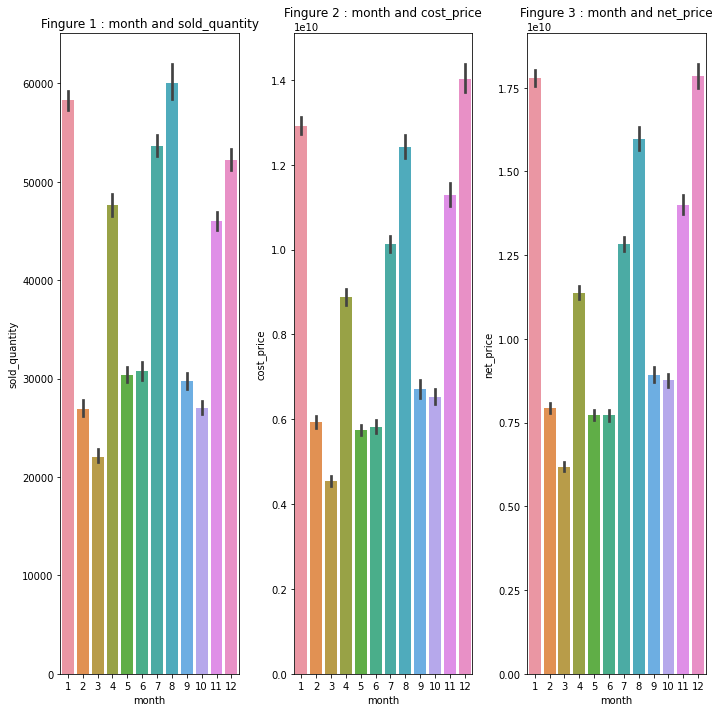

In [18]:
fig , ax = plt.subplots(1,3,figsize=(10,10))
cols=['sold_quantity','cost_price','net_price']
for i in range(0,3):
    if i < len(cols):
        ax_i=ax[i]
        sns.barplot(data=train_sale_set,x='month',y=cols[i],estimator=sum,ax=ax_i)
        ax_i.set_title(f"Fingure {i+1} : month and {cols[i]}")
plt.tight_layout()
plt.show()

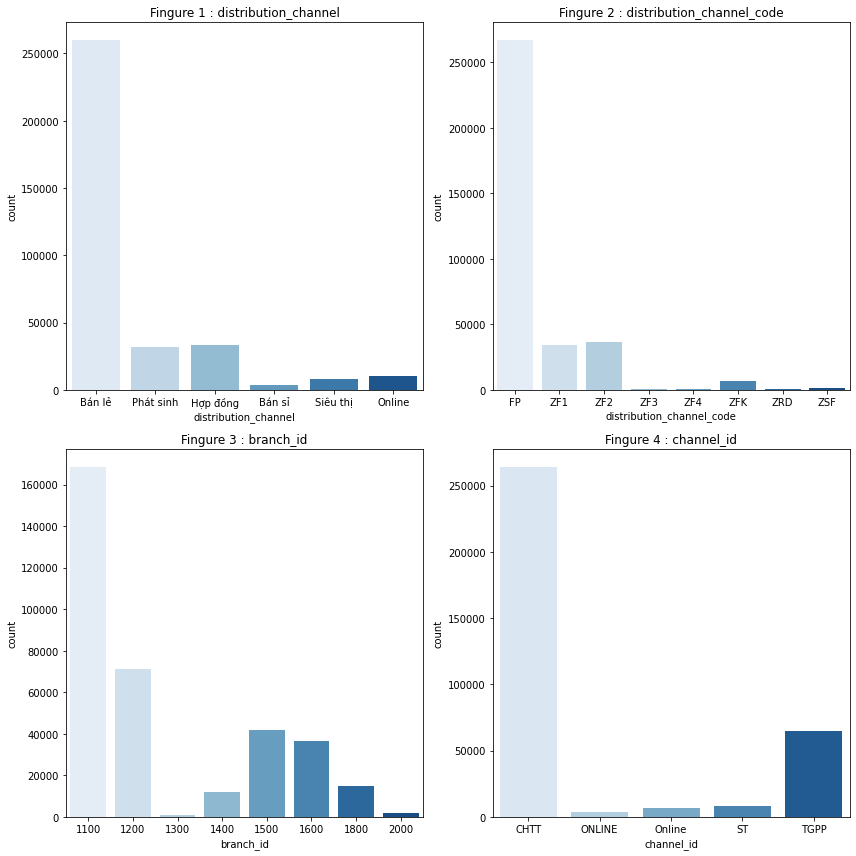

In [19]:
fig1 , ax1 = plt.subplots(2,2,figsize=(12,12))
iduntknow=['distribution_channel','distribution_channel_code','branch_id','channel_id']
for j in range(0,2):
    for c in range(0,2):
        i=j*2+c
        if i < len(iduntknow):
            ax_i=ax1[j,c]
            sns.countplot(data=train_sale_set,x=iduntknow[i],palette='Blues',ax=ax_i)
            ax_i.set_title(f"Fingure {i+1} : {iduntknow[i]}")
plt.tight_layout()
plt.show()

### Follow the figure , we could see that 
#### Customer love to buy stuffe that sell single
#### ....